# Importing necessary libraries and train files

In [146]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# from sklearn.feature_selection import f_regression
from sklearn.linear_model import LogisticRegression

In [147]:
index_names = ['engine_num', 'time_cycles']
setting_names = ['set_1', 'set_2', 'set_3']
sensor_names = ['s_{}'.format(i) for i in range(1,25)]  # preparing the column headings
col_names = index_names + setting_names + sensor_names

df= pd.read_csv('train_FD001.txt',sep=' ',names=col_names, index_col=0) 
df.dropna(how='all', axis=1, inplace=True) # conditioning the dataframe by dropping all the null columns

df

,time_cycles,set_1,set_2,set_3,s_1,s_2,s_3,s_4,s_5,s_6,...,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21
engine_num,,,,,,,,,,,,,,,,,,,,,
1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,21.61,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,21.61,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,21.61,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333


# Exploring of the training dataset

In [148]:
# initial exploting of the datasets to check for null values
print(df.shape)
df.isnull().sum()

(20631, 25)


time_cycles    0
set_1          0
set_2          0
set_3          0
s_1            0
s_2            0
s_3            0
s_4            0
s_5            0
s_6            0
s_7            0
s_8            0
s_9            0
s_10           0
s_11           0
s_12           0
s_13           0
s_14           0
s_15           0
s_16           0
s_17           0
s_18           0
s_19           0
s_20           0
s_21           0
dtype: int64

it is observed that all the values are null values in S_22 and S_23 and hence they are dropped from all the dataframes

In [149]:
print(df.shape)

(20631, 25)


Fetching the life ratio (LR) and Remaining useful life for prediction

In [150]:
EOL = []
for i in df.index:
    EOL.append(df.loc[i]['time_cycles'].max())
df['EOL'] = EOL
df['LR'] = df['time_cycles']/df['EOL']
df['RUL'] = df['EOL'] - df['time_cycles']
df.drop('EOL',axis=1,inplace=True)
df

,time_cycles,set_1,set_2,set_3,s_1,s_2,s_3,s_4,s_5,s_6,...,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21,LR,RUL
engine_num,,,,,,,,,,,,,,,,,,,,,
1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,0.005208,191
1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,0.010417,190
1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,0.015625,189
1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,0.020833,188
1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,0.026042,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,21.61,...,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,0.980000,4
100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,21.61,...,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,0.985000,3
100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,21.61,...,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,0.990000,2


EDA to see and visualize the variable distribution

In [151]:
# fig, ax = plt.subplots(nrows = df.shape[1],ncols = 1,figsize=(25,45))

# for i in range(0,len(df.columns)):
#     sns.lineplot(data=df,x =df['LR'],y=df[df.columns[i]],ax=ax[i])

In [152]:
# fig.savefig('DF1_variables.png',format='png')

# Optimizing the dataset for machine learning (selecting the independant variables) by removing the highly correlated variables

<AxesSubplot:>

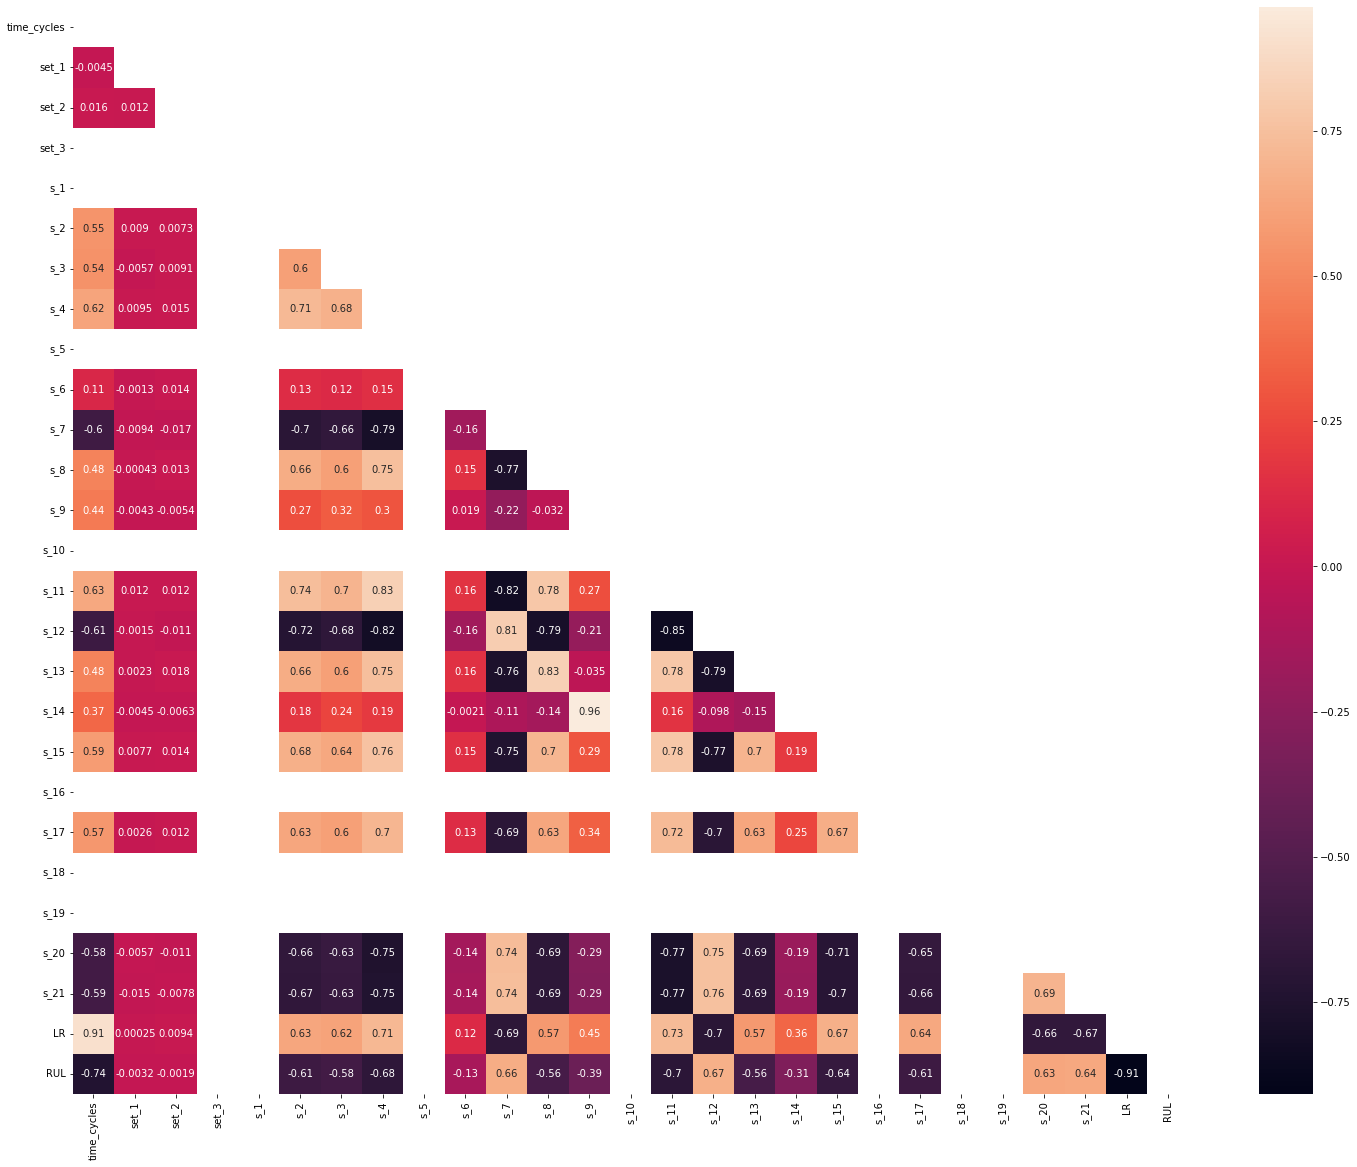

In [153]:
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(),annot=True , mask=np.triu(df.corr()))

eliminating variables which do not vary with time

In [154]:
# considering all the engines
static_var = df.describe().loc['std'][df.describe().loc['std']<0.00001]
static_var

set_3    0.000000e+00
s_1      6.537152e-11
s_5      3.394700e-12
s_10     4.660829e-13
s_16     1.556432e-14
s_18     0.000000e+00
s_19     0.000000e+00
Name: std, dtype: float64

In [155]:
df = df.drop(static_var.index,axis=1)
df

,time_cycles,set_1,set_2,s_2,s_3,s_4,s_6,s_7,s_8,s_9,s_11,s_12,s_13,s_14,s_15,s_17,s_20,s_21,LR,RUL
engine_num,,,,,,,,,,,,,,,,,,,,
1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,21.61,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,0.005208,191
1,2,0.0019,-0.0003,642.15,1591.82,1403.14,21.61,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,0.010417,190
1,3,-0.0043,0.0003,642.35,1587.99,1404.20,21.61,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,0.015625,189
1,4,0.0007,0.0000,642.35,1582.79,1401.87,21.61,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,0.020833,188
1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,21.61,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,0.026042,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,196,-0.0004,-0.0003,643.49,1597.98,1428.63,21.61,551.43,2388.19,9065.52,48.07,519.49,2388.26,8137.60,8.4956,397,38.49,22.9735,0.980000,4
100,197,-0.0016,-0.0005,643.54,1604.50,1433.58,21.61,550.86,2388.23,9065.11,48.04,519.68,2388.22,8136.50,8.5139,395,38.30,23.1594,0.985000,3
100,198,0.0004,0.0000,643.42,1602.46,1428.18,21.61,550.94,2388.24,9065.90,48.09,520.01,2388.24,8141.05,8.5646,398,38.44,22.9333,0.990000,2


Text(0.5, 1.0, 'correlation for the complete dataset')

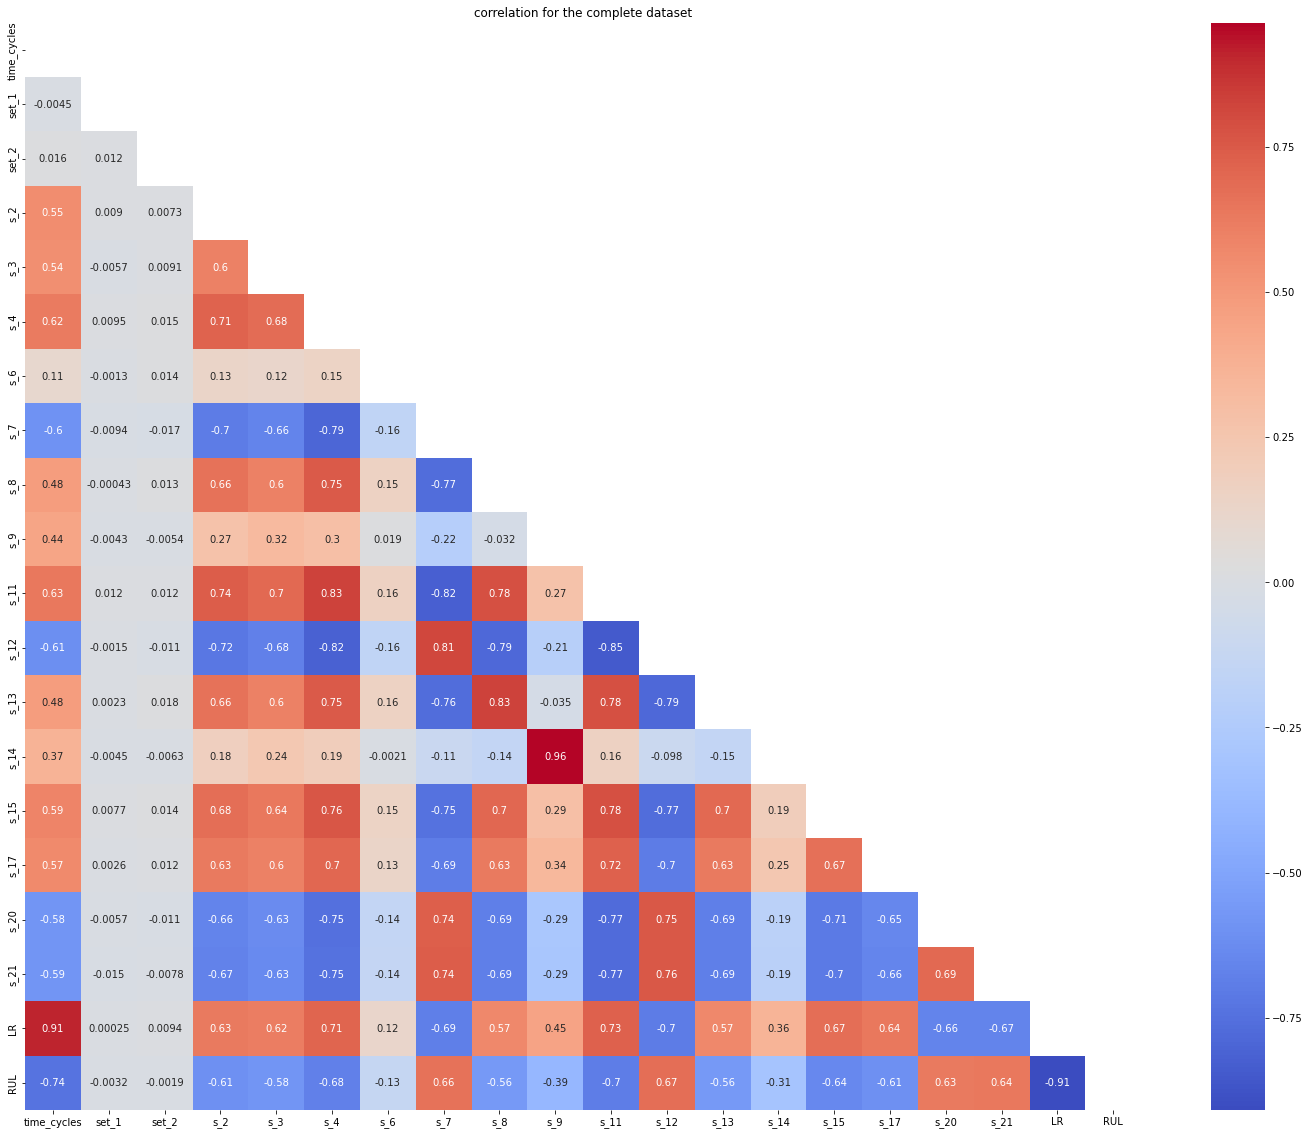

In [156]:
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(), annot=True, cmap = 'coolwarm', mask = np.triu(df.corr()) )
plt.title('correlation for the complete dataset')

In [157]:
def plot_corr(df,engine_num):
    tdf = df.loc[engine_num]
    fig = plt.figure(figsize=(25,20))
    sns.heatmap(tdf.corr(), annot=True, cmap='coolwarm', mask = np.triu(tdf.corr()))
    plt.title('correlation matrix for engine number: {}'.format(engine_num))

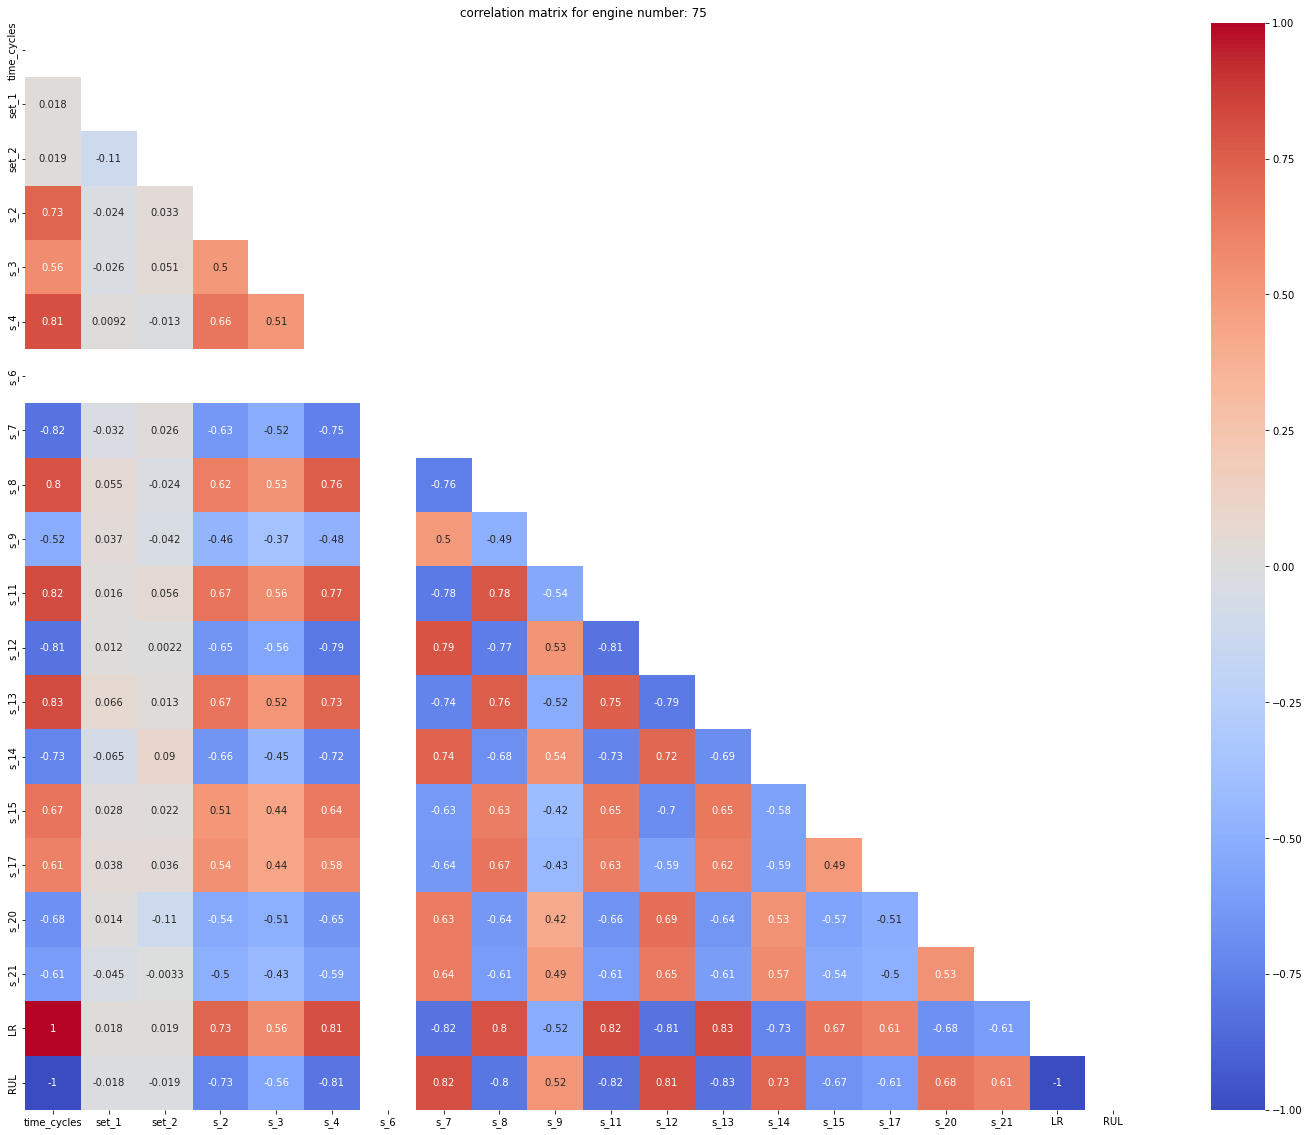

In [158]:
plot_corr(df,75)

fetching the null correlations in individual engine wise correlations

In [159]:
col_list = []
eng_list = []
for i in df.index.unique():
    tdf = df.loc[i]
    for j in tdf.corr().columns:
       if tdf.corr()[j].isnull().sum() == tdf.shape[1]:
           col_list.append(j)
           eng_list.append(i)

a = {'Engine list' : eng_list, 'column': col_list}
a = pd.DataFrame(a)
a = a.set_index('Engine list')
a

,column
Engine list,
1,s_6
6,s_6
8,s_6
12,s_6
13,s_6
14,s_6
16,s_6
19,s_6
20,s_6


sensor 6 seems to not have anycorrelation in several engine readings. Hence Dropping the same

In [160]:
df = df.drop('s_6', axis=1)
df

,time_cycles,set_1,set_2,s_2,s_3,s_4,s_7,s_8,s_9,s_11,s_12,s_13,s_14,s_15,s_17,s_20,s_21,LR,RUL
engine_num,,,,,,,,,,,,,,,,,,,
1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,0.005208,191
1,2,0.0019,-0.0003,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,0.010417,190
1,3,-0.0043,0.0003,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,0.015625,189
1,4,0.0007,0.0000,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,0.020833,188
1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,0.026042,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,196,-0.0004,-0.0003,643.49,1597.98,1428.63,551.43,2388.19,9065.52,48.07,519.49,2388.26,8137.60,8.4956,397,38.49,22.9735,0.980000,4
100,197,-0.0016,-0.0005,643.54,1604.50,1433.58,550.86,2388.23,9065.11,48.04,519.68,2388.22,8136.50,8.5139,395,38.30,23.1594,0.985000,3
100,198,0.0004,0.0000,643.42,1602.46,1428.18,550.94,2388.24,9065.90,48.09,520.01,2388.24,8141.05,8.5646,398,38.44,22.9333,0.990000,2


In [161]:
def find_corr_pairs(corr,thrsh):
    
    """
    find high correlation column pairs in df 
    ======================================
    input: 
    corr - (df)- correlation matrix generated by pandas
    thrsh - (float) threshold value to consider correlation as high so that it is included in the output 
    output:
    high_corr_pairs - (list) list of tuples of the two-column names and their correlation. corr> thrsh
    """
    high_corr_pairs = []
    # same as input 'corr' but the upper -triangle half of the matrix is zeros ( for convenience only) 
    corr_diag = pd.DataFrame(np.tril(corr.values), columns=corr.columns, index = corr.index)

    # check  the correlation between every pair of columns in the corr and keeps the high ones
    for col_num , col in enumerate(corr_diag):
        col_corr=corr_diag[col].iloc[col_num+1:] # this slicing ensures ignoring self_corr and duplicates due to symmetry
        # bool mask for pairs with high corr with col
        mask_pairs = col_corr.apply(lambda x: abs(x))>thrsh 
        idx_pairs=col_corr[mask_pairs].index

        # create list of high corr pairs
        for idx , corr in zip(idx_pairs,col_corr[mask_pairs].values):
            high_corr_pairs.append((col, idx, corr))
    
    return high_corr_pairs 

In [162]:
engine_num=5
corr_all=df.drop('time_cycles',axis=1).corr()# linear correlation between variables for all engines
corr_num=df.loc[engine_num].drop('time_cycles',axis=1).corr() # linear correlation between variables for engine [engine_num]

In [163]:
corr_pairs=find_corr_pairs(corr_all,0.9)
for c in corr_pairs:
    print(c)

('s_9', 's_14', 0.9631566003059776)
('LR', 'RUL', -0.9084599112112265)


In [164]:
print(df.columns)
df = df.drop('s_14',axis=1)
print(df.columns)

Index(['time_cycles', 'set_1', 'set_2', 's_2', 's_3', 's_4', 's_7', 's_8',
       's_9', 's_11', 's_12', 's_13', 's_14', 's_15', 's_17', 's_20', 's_21',
       'LR', 'RUL'],
      dtype='object')
Index(['time_cycles', 'set_1', 'set_2', 's_2', 's_3', 's_4', 's_7', 's_8',
       's_9', 's_11', 's_12', 's_13', 's_15', 's_17', 's_20', 's_21', 'LR',
       'RUL'],
      dtype='object')


In [165]:
def plot_ts_all(df):
    
    # prepare the dataframe for plotting
    ts = df.copy() # df for the needed engine
    ts.drop(labels=['time_cycles'],axis=1,inplace=True)
    
    cols = ts.columns
    # plotting
    fig, axes = plt.subplots(len(cols)-2, 1, figsize=(25,20))
    for col, ax in zip(cols, axes):
        if col == 'time_cycles':
            continue
            
        fontdict = {'fontsize': 14}
        ax.set_title(col,loc='left',fontdict=fontdict)
        for engine_id in ts.index.unique():
            time = df.loc[engine_id,'time_cycles']
            ax.plot(time,ts.loc[engine_id,col],label=col)

    # figure title    
    fig.suptitle('All Engines Time Series \n each line is different engine resposne\n x-axis is number of cycles with the rightmost point being the last cycle for all engines')
    return fig

In [166]:
# fig=plot_ts_all(df)
# plt.tight_layout()

1. Its observed from these individual data that settings 1 and 2 does not have any apparent trend and are simply noise added till the its terminal point.
2. other sensor readings shows some level of trends, either increasing or decreasing trend, which is predominately visible in sensor 9 readout.

In [167]:
df = df.drop(['set_1','set_2'],axis=1)
df

,time_cycles,s_2,s_3,s_4,s_7,s_8,s_9,s_11,s_12,s_13,s_15,s_17,s_20,s_21,LR,RUL
engine_num,,,,,,,,,,,,,,,,
1,1,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8.4195,392,39.06,23.4190,0.005208,191
1,2,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8.4318,392,39.00,23.4236,0.010417,190
1,3,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8.4178,390,38.95,23.3442,0.015625,189
1,4,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8.3682,392,38.88,23.3739,0.020833,188
1,5,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8.4294,393,38.90,23.4044,0.026042,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,196,643.49,1597.98,1428.63,551.43,2388.19,9065.52,48.07,519.49,2388.26,8.4956,397,38.49,22.9735,0.980000,4
100,197,643.54,1604.50,1433.58,550.86,2388.23,9065.11,48.04,519.68,2388.22,8.5139,395,38.30,23.1594,0.985000,3
100,198,643.42,1602.46,1428.18,550.94,2388.24,9065.90,48.09,520.01,2388.24,8.5646,398,38.44,22.9333,0.990000,2


The RUL prediction can be performed in several ways. either a classification problem or a regression problem:
1. Classification problem 
    Using LR (i.e., ratio of present cycle to the max cycle of that engine)
        with this approach the entire life cycle of each engine could be classified into 3 regions
            0 to 60 % LR -> good condition engine
            60% to 80 % LR -> moderate condition engine and 
            80% to 100 % LR -> terminal condition/faulty engine

2. For regression problem, we could either use LR or RUL as target variable and the remaining variables to be features

# standardizing sensor values

In [168]:
# get all sensors
raw_columns = df.columns[1:-2]
raw_sensors = df[raw_columns] # as numpy array

In [169]:
standard_scale = StandardScaler()
standard_sensors = standard_scale.fit_transform(raw_sensors)

# linear regression to fetch the sensor slopes

In [170]:
lin_model =LinearRegression()

In [171]:
engine_num=3
x = df.loc[engine_num,'RUL'].values

In [172]:
row_sl=df.index.get_loc(engine_num) # row slice to get numpy index 
row_sl

slice(479, 658, None)

In [173]:
y=standard_sensors[row_sl] # sensor values for the specifc engine
y

array([[-1.2817616 , -1.03133545, -1.20036862, ..., -1.42740201,
         0.79521805,  0.28448163],
       [-0.04186365, -0.56811582, -1.14592651, ..., -2.07309423,
         1.40382021,  1.35978769],
       [-1.22176654, -1.59404944, -0.8703828 , ..., -0.13601757,
         1.18251034,  0.24475813],
       ...,
       [ 1.99796847,  1.74308918,  1.61839917, ...,  2.44675132,
        -2.46910261, -2.36590761],
       [ 1.95797176,  2.6059173 ,  2.40169886, ...,  3.73813576,
        -1.36255323, -1.45411458],
       [ 1.65799645,  2.32863794,  2.14393215, ...,  3.09244354,
        -2.3031202 , -3.0809307 ]])

In [174]:
lin_model.fit(x.reshape(-1, 1),y)

LinearRegression()

In [175]:
lin_model.coef_[:,0].shape

(13,)

In [176]:
lin_model.score(x.reshape(-1, 1),y)

0.5027699485857744

In [177]:
y_hat = lin_model.predict(x.reshape(-1, 1))

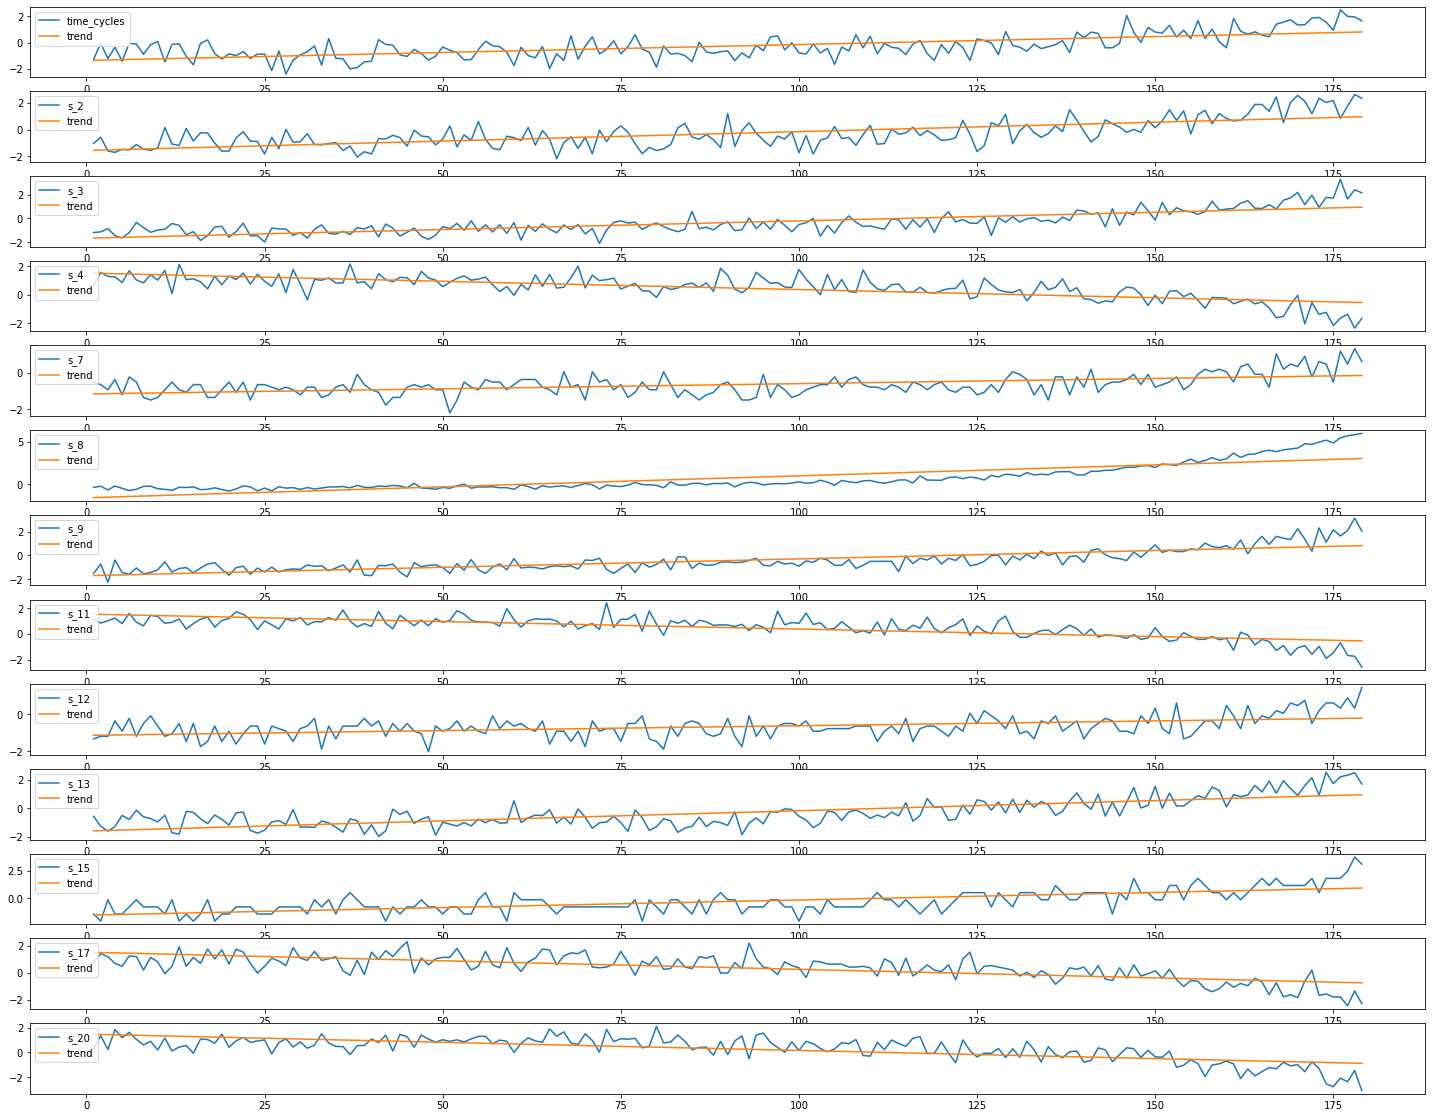

In [178]:
# plotting
time = df.loc[engine_num,'time_cycles']
cols = df.columns[1:-2]
fig, axes = plt.subplots(len(cols), 1, figsize=(25,20))
for col, ax in zip(range(standard_sensors.shape[1]), axes):
    ax.plot(time,standard_sensors[row_sl,col],label=df.columns[col])
    ax.plot(time,y_hat[:,col],label='trend')
    ax.legend(loc=2)

In [179]:
def lin_slopes(sensors,df,engine_num):
    """
    gives slopes of a teh tred lines for each sesnor 
    =================================================
    input: 
    sensors - (ndarray) numpy array of standardized signals ( rows: -RUL columns, various signals)
    engine_num - (int) engine number to selector
    df - (df) data frame of data
    output: 
    slopes -(ndarray) numpy array of slopes rows: slope of each signal linear trend line
    """
    model = LinearRegression()
    x = df.loc[engine_num,'RUL'].values
    row_name=df.loc[engine_num].iloc[-1].name
    row_sl=df.index.get_loc(row_name) # row slice to get numpy index 
    y=sensors[row_sl] # sensor values for the specifc engine
    model.fit(x.reshape(-1, 1),y)
    slopes=model.coef_[:,0]
    return slopes

In [180]:
 model = LinearRegression()
 model.fit(x.reshape(-1, 1),y)
 model.coef_[:,0]

array([-0.01213049, -0.01402176, -0.01457614,  0.01150702, -0.00566421,
       -0.02590653, -0.01410581,  0.0115465 , -0.00522121, -0.01418821,
       -0.01370743,  0.01268412,  0.01317799])

In [181]:
# finding slopes for all engines
engines=df.index.unique().values
slopes = np.empty((standard_sensors.shape[1],len(engines)))
for i,engine in enumerate(engines):
    slopes[:,i] = lin_slopes(standard_sensors,df,engine) 

In [182]:
# creating slopes_df
slopes_df = pd.DataFrame(slopes.T,index=engines,columns =raw_columns )

In [183]:
# index of highest to lowest abs(slope) for each signal 
slope_order_idx=np.argsort(np.abs(slopes.mean(axis=1)))[::-1]
slope_order_idx

array([ 6,  2,  7,  3,  9, 12, 11, 10,  0,  1,  8,  4,  5], dtype=int64)

In [184]:
slope_order_idx

array([ 6,  2,  7,  3,  9, 12, 11, 10,  0,  1,  8,  4,  5], dtype=int64)

# PCA with all the sensor readings

In [185]:
pca = PCA()
pca.fit(standard_sensors)

PCA()

In [186]:
100*pca.explained_variance_ratio_

array([68.92499095,  9.10984975,  3.17575244,  2.82500121,  2.6682035 ,
        2.35450554,  2.22533398,  1.9105238 ,  1.57960165,  1.42257128,
        1.35704776,  1.32673415,  1.11988399])

<AxesSubplot:>

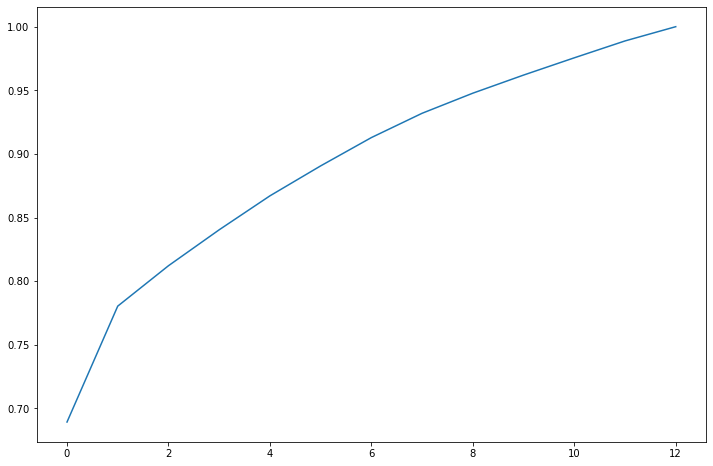

In [187]:
pd.Series(pca.explained_variance_ratio_.cumsum()).plot(figsize=(12,8))

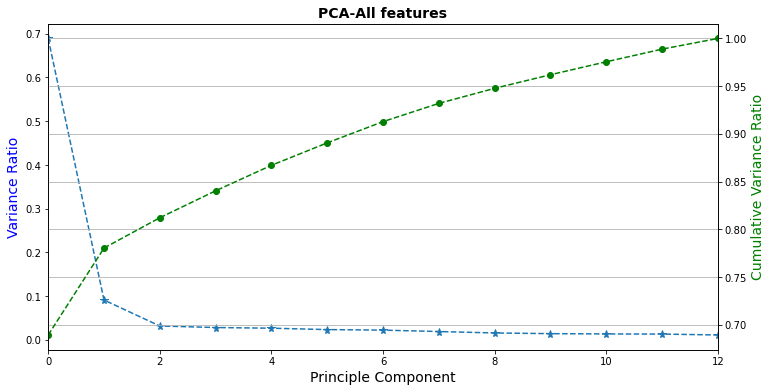

In [188]:
fig, ax1 = plt.subplots(figsize = (12,6))
ax2 = ax1.twinx()

# generate the plots
ax1.plot(pca.explained_variance_ratio_, '--*', ms=8);
ax2.plot(pca.explained_variance_ratio_.cumsum(), '--go');

#setup axis titles
ax1.set_xlabel('Principle Component', fontsize=14)
ax1.set_ylabel('Variance Ratio', color= 'b', fontsize=14)
ax2.set_ylabel('Cumulative Variance Ratio', color='g', fontsize=14)

plt.grid()
plt.title('PCA-All features',fontsize=14,fontweight='bold')
plt.xlim(0,pca.n_components_-1)

plt.show()

PCA with 6 most influential sensors

In [189]:
num_high_slopes = 6
pca_high_n_components=5
sensors_high_trend=standard_sensors[:,slope_order_idx[0:num_high_slopes]]
pca_high = PCA(pca_high_n_components,whiten=True)
pca_high.fit(sensors_high_trend)

PCA(n_components=5, whiten=True)

In [190]:
pca_high.explained_variance_ratio_

array([0.81660323, 0.04968993, 0.0442961 , 0.03439886, 0.03014873])

In [191]:
sensors_pca=pca_high.transform(sensors_high_trend)
sensors_pca.shape

(20631, 5)

# <font color = 'orange'> RUL prediction </font>

In [192]:
# create a dictionary with engine slices 

engines=df.index.unique() # engine numbers
engine_slices = dict()# key is engine number, value is a slice that gives numpy index for the data that pertains to an engine  

for i,engine_num in enumerate(engines):
    row_name=df.loc[engine_num].iloc[-1].name
    row_sl=df.index.get_loc(row_name) # row slice to get numpy index 
    engine_slices[engine_num]=row_sl

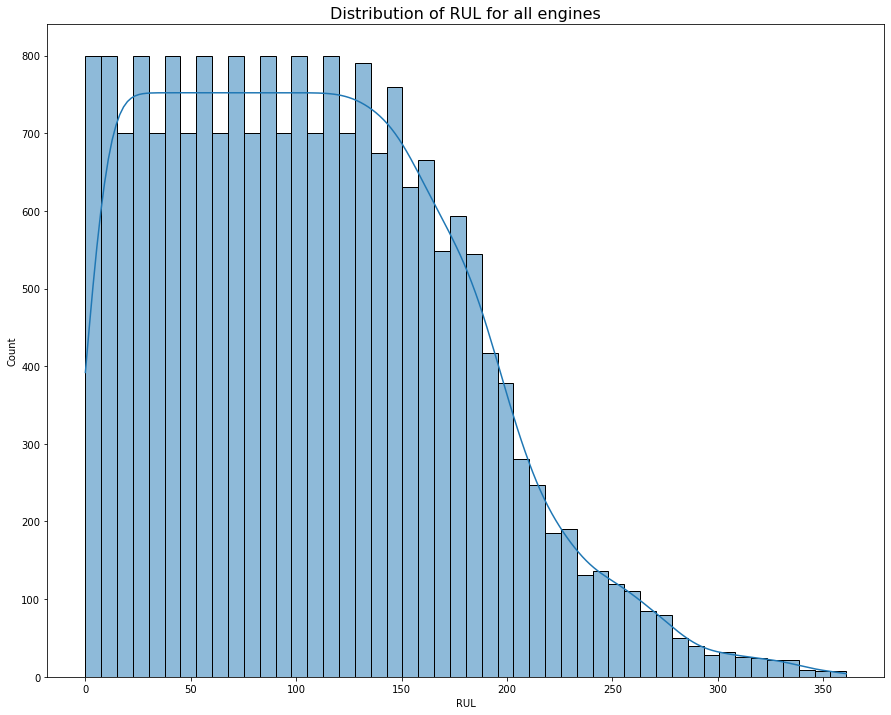

In [193]:
# ax = plt.subplot(figsize=(15,12))
fig=plt.figure(figsize=(15,12))
ax=sns.histplot(df['RUL'],kde=True)
ax.set_title('Distribution of RUL for all engines',{'fontsize':16});
ax.set_xlabel('RUL');

# obtaining HI from the sensors data

In [194]:
# conditions and thersholds for high HI and low HI
RUL_high = 300 # threshold of number of cycles that makes us consider the engine started at perfect health 
RUL_low = 5  # threshold of the number of cycles below which engine is considered has failed l ( for purposes of modeling and getting data)  
RUL_df = df['RUL'].values

In [195]:
# Gather data and prepare it for HI fusing and modeling

# find engines with high (low) HI at their initial (final) cycles
idx_high_HI = [RUL_df<=RUL_high][0]
idx_low_HI  = [RUL_df>RUL_low][0]

# data for to make fuse sensor model (HI creation)
high_HI_data= sensors_pca[idx_high_HI,:]
low_HI_data= sensors_pca[idx_low_HI,:]
# concatenate high HI and Low HI data
X_HI = np.concatenate((high_HI_data,low_HI_data),axis=0)

# target for the fused signal [ just 0 or 1 for failed ans healthy]
y_one = np.ones(high_HI_data.shape[0])
y_zero = np.zeros(low_HI_data.shape[0])
# concatenate high HI and Low HI target
y_HI = np.concatenate((y_one,y_zero),axis=0)

In [196]:
idx_high_HI

array([ True,  True,  True, ...,  True,  True,  True])

In [197]:
# fit a model to get fused sensor 

# linear regression
HI_linear = LinearRegression()
HI_linear.fit(X_HI,y_HI)

# logistic regression
HI_logistic = LogisticRegression(solver='liblinear')
HI_logistic.fit(X_HI,y_HI)

LogisticRegression(solver='liblinear')

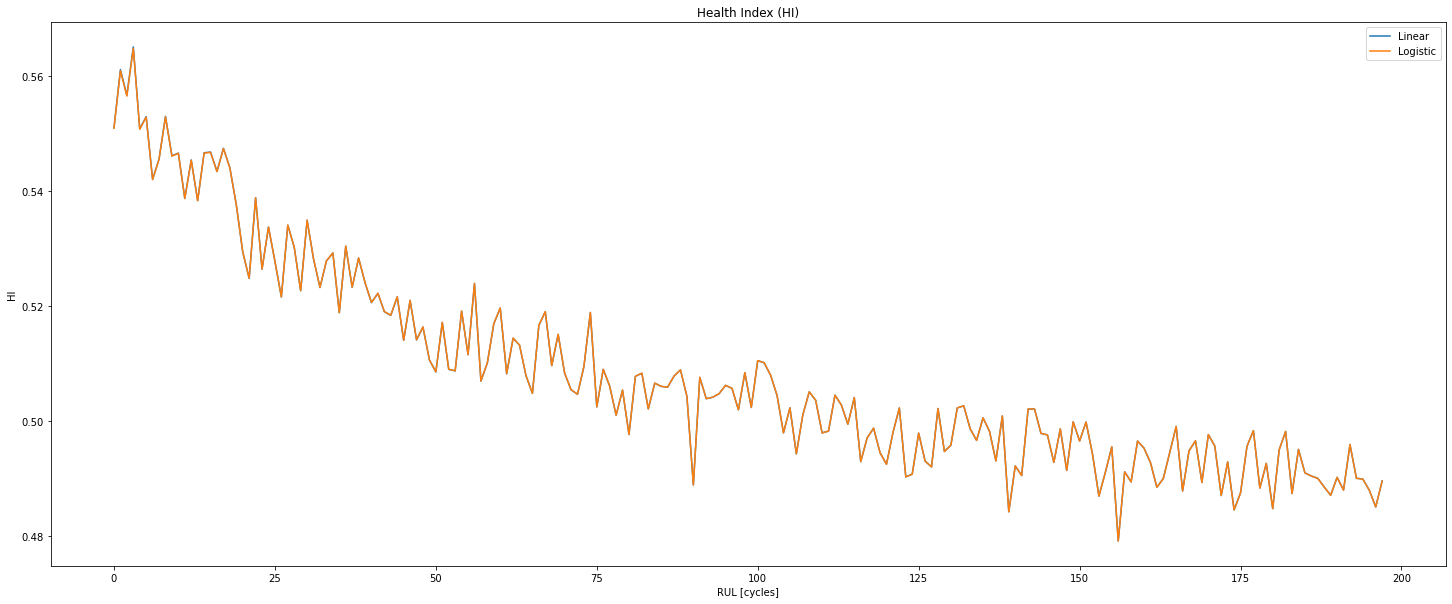

In [198]:
# let's see how this HI varies with RUL for a specific engine 

# get data for and engine
engine_num=50
engine_sensors=sensors_pca[engine_slices[engine_num],:]
RUL_engine = df.loc[engine_num]['RUL']

# predict the HI
HI_pred_lin = HI_linear.predict(engine_sensors)
HI_pred_log = HI_logistic.predict_proba(engine_sensors)[:,1]

# plot fused HI signal for linear and logistic models \
fig=plt.figure(figsize=(25,10))
plt.plot(RUL_engine,HI_pred_lin,label='Linear')
plt.plot(RUL_engine,HI_pred_log,label='Logistic')
plt.title('Health Index (HI)')
plt.xlabel('RUL [cycles]')
plt.ylabel('HI')
plt.legend();

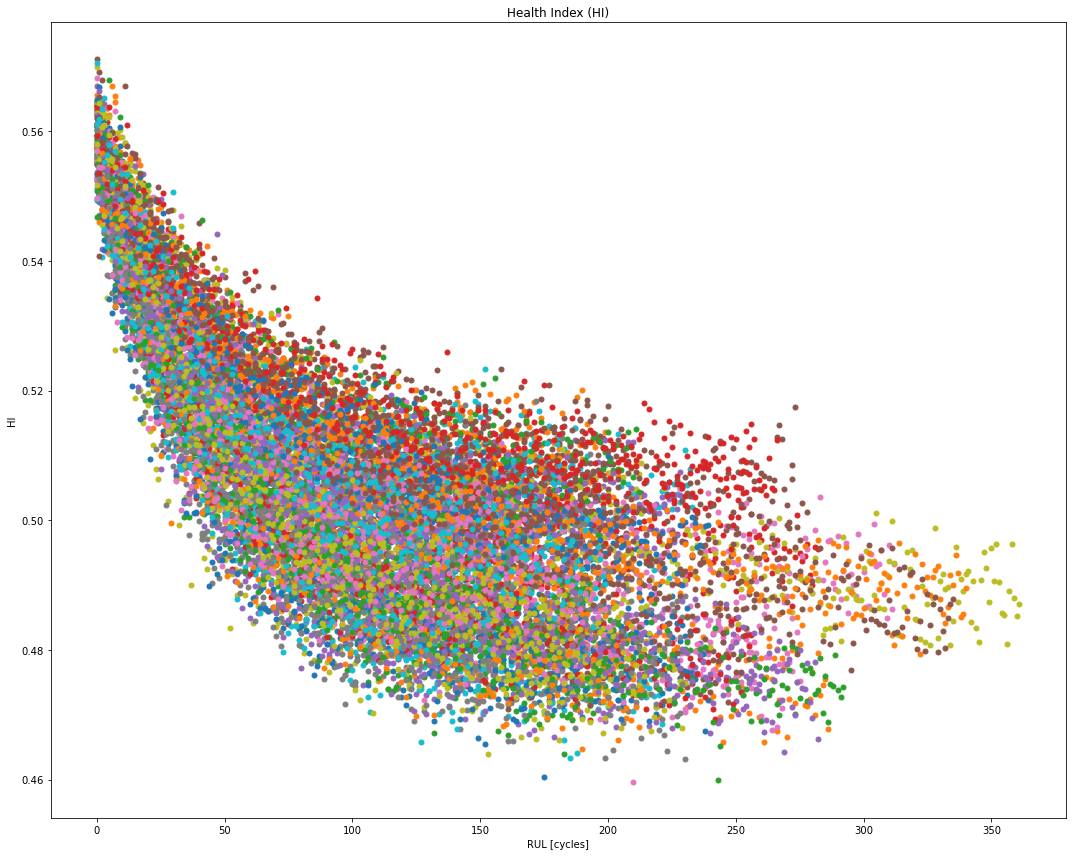

In [199]:
fig=plt.figure(figsize=(15,12))
for engine_num in engines:
    
    engine_sensors=sensors_pca[engine_slices[engine_num],:]
    RUL_engine = df.loc[engine_num]['RUL']

    # predict the HI
    HI_pred_lin = HI_linear.predict(engine_sensors)
#     HI_pred_log = HI_logistic.predict_proba(engine_sensors)[:,1]
    
    plt.scatter(RUL_engine,HI_pred_lin,label=engine_num,s=25)
#     plt.scatter(RUL_engine,HI_pred_log,label='Logistic')
    plt.title('Health Index (HI)')
    plt.xlabel('RUL [cycles]')
    plt.ylabel('HI')
    plt.tight_layout()
#     plt.legend();

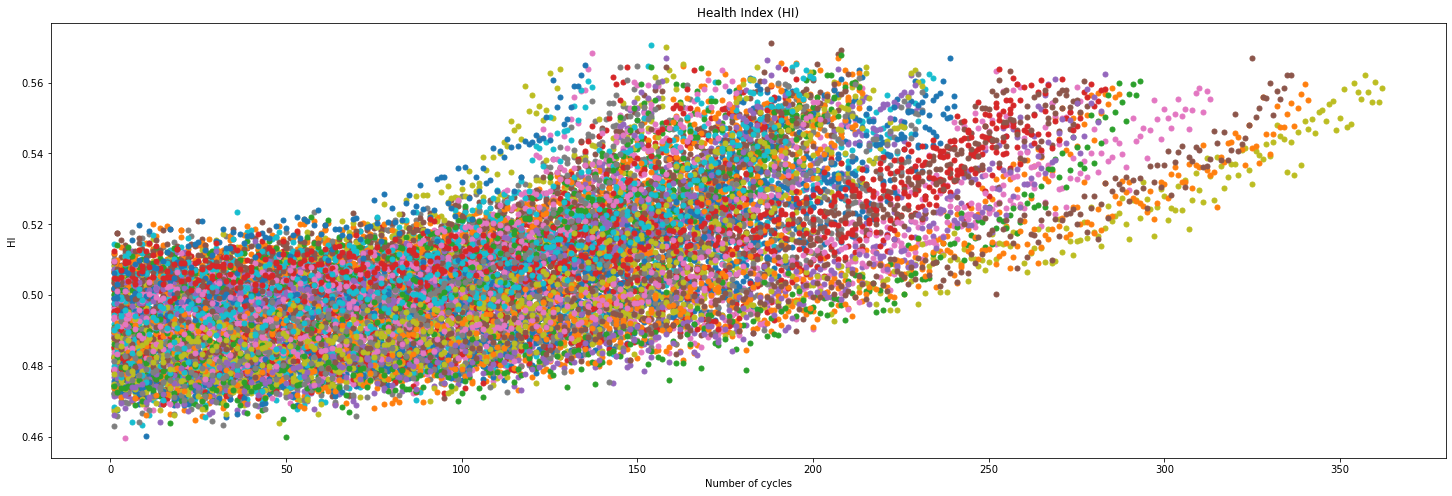

In [200]:
fig=plt.figure(figsize=(25,8))
for engine_num in engines:
    
    engine_sensors=sensors_pca[engine_slices[engine_num],:]
    RUL_engine = df.loc[engine_num]['time_cycles']

    # predict the HI
    HI_pred_lin = HI_linear.predict(engine_sensors)
#     HI_pred_log = HI_logistic.predict_proba(engine_sensors)[:,1]
    
    plt.scatter(RUL_engine,HI_pred_lin,label=engine_num,s=25)
    # plt.scatter(RUL_engine,HI_pred_log,label='Logistic')
    plt.title('Health Index (HI)')
    plt.xlabel('Number of cycles')
    plt.ylabel('HI')
#     plt.legend();

# Predicting RUL

to predict the RUL, we use a regression based appriroach, where in we use the fused sensor data (i.e., Helath Index) as inputs and predict the RUL

In [201]:
lm = LinearRegression().fit(standard_sensors,df['RUL'])

In [202]:
from sklearn.model_selection import train_test_split

In [203]:
X = pca.transform(standard_sensors)
y = df['RUL']

In [220]:
X.shape

(20631, 13)

In [221]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [222]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(20631, 13)
(18567, 13)
(2064, 13)


In [223]:
lm1 = LinearRegression().fit(X_train,y_train)

In [224]:
y_predict = lm1.predict(X_test)

In [225]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [226]:
MAE = mean_absolute_error(y_test,y_predict)
MSE = mean_squared_error(y_test,y_predict)
print('MAE: \t{}'.format(MAE))
print('MSE: \t{}'.format(MSE))
print('RMSE:\t{}'.format(np.sqrt(MSE)))
print('MEAN:\t {}'.format(y_test.mean()))
print('% error: {}'.format(100*np.sqrt(MSE)/y_test.mean()))

MAE: 	33.99844042924541
MSE: 	1922.026047559994
RMSE:	43.84091750362889
MEAN:	 108.65552325581395
% error: 40.34854022138543


In [227]:
from sklearn.ensemble import RandomForestRegressor

In [233]:
rfr = RandomForestRegressor(n_estimators=100,max_depth=5, min_samples_split=2, min_samples_leaf=1).fit(X_train,y_train)
rfr_y_predict = rfr.predict(X_test)

In [234]:
rfr_MAE = mean_absolute_error(y_test,rfr_y_predict)
rfr_MSE = mean_squared_error(y_test,rfr_y_predict)
print('MAE: \t{}'.format(rfr_MAE))
print('MSE: \t{}'.format(rfr_MSE))
print('RMSE:\t{}'.format(np.sqrt(rfr_MSE)))
print('MEAN:\t {}'.format(y_test.mean()))
print('% error: {}'.format(100*np.sqrt(rfr_MSE)/y_test.mean()))

MAE: 	30.0488317865194
MSE: 	1687.8622036186655
RMSE:	41.08360017840045
MEAN:	 108.65552325581395
% error: 37.81087141025954


In [235]:
from sklearn.tree import DecisionTreeRegressor

In [237]:
dtr = DecisionTreeRegressor(max_depth=5, min_samples_split=2, min_samples_leaf=1).fit(X_train,y_train)
dtr_y_predict = dtr.predict(X_test)

In [238]:
dtr_MAE = mean_absolute_error(y_test,dtr_y_predict)
dtr_MSE = mean_squared_error(y_test,dtr_y_predict)
print('MAE: \t{}'.format(dtr_MAE))
print('MSE: \t{}'.format(dtr_MSE))
print('RMSE:\t{}'.format(np.sqrt(dtr_MSE)))
print('MEAN:\t {}'.format(y_test.mean()))
print('% error: {}'.format(100*np.sqrt(dtr_MSE)/y_test.mean()))

MAE: 	30.508410819218746
MSE: 	1737.9833842332162
RMSE:	41.68912789005326
MEAN:	 108.65552325581395
% error: 38.368162649129346
